In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from itertools import product
import pickle as pkl
PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH+'params.npz', allow_pickle=True)
PATH = '.\\data\\gog\\nonlocaldensity_recurrence\\'
constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2

In [2]:
rec_time = np.zeros((len(r_ds), len(thetas), reps), dtype=int)
rec_time = np.ma.array(rec_time, mask=True)
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH+'data{}.pkl'.format(index+(i, 0,)), 'rb') as f:
            d = pkl.load(f)
        rec_time[index+(i,)] = d['tmax']
        rec_time.mask[index+(i,)] = False if d['n_it'] > 0 else True

In [3]:
# number of failed recurrence
rec_time.mask.sum()

4

In [4]:
(~rec_time.mask).sum()

656

In [5]:
bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)
extent = [thetas[0]-dtheta, thetas[-1]+dtheta, r_ds[0]-dr_ds, r_ds[-1]+dr_ds]

In [9]:
%matplotlib inline

In [10]:
plt.style.use('default')
plt.style.use('nature_style.mplstyle')

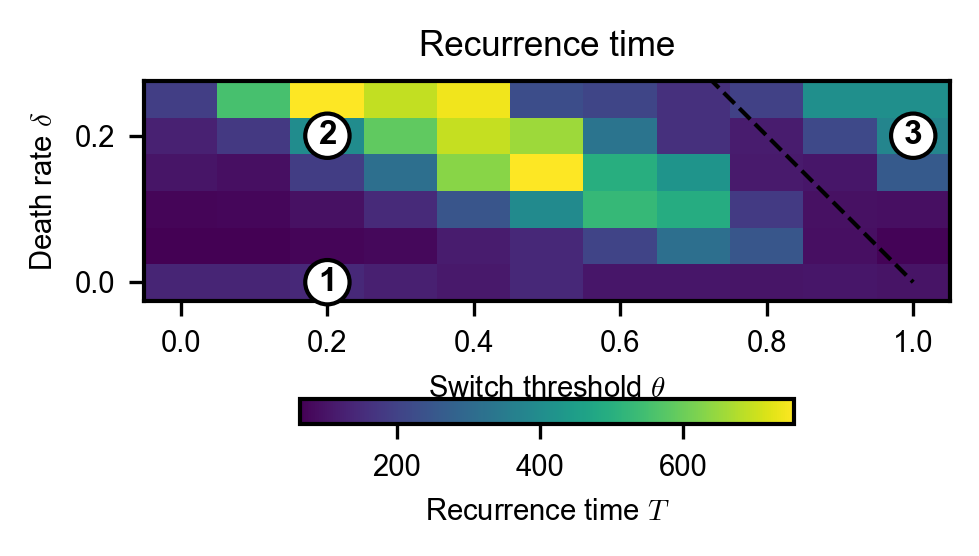

In [11]:
plt.imshow(rec_time.mean(-1), aspect='equal', extent=extent, origin='lower')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
plt.colorbar(label=r'Recurrence time $T$', pad=0.2, fraction=0.05, orientation='horizontal')
# contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='upper')
plt.plot([thetas[0], thetas[-1]], [1 - thetas[0], 1 - thetas[-1]], 'k--')
plt.ylim(-dr_ds, r_ds[-1]+dr_ds)
plt.title('Recurrence time')
plt.savefig('rec_time.png', bbox_inches='tight')

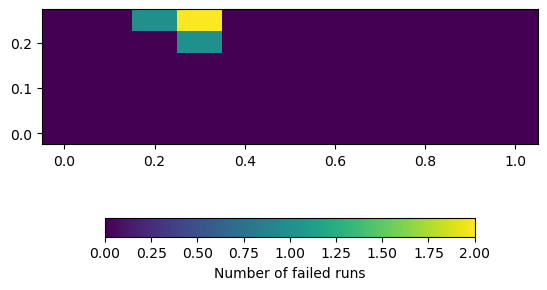

In [21]:
plt.imshow(rec_time.mask.sum(-1), aspect='equal', extent=extent, origin='lower')
plt.colorbar(label=r'Number of failed runs', pad=0.2, fraction=0.05, orientation='horizontal')